<module 'matplotlib.pyplot' from 'c:\\users\\kukuk\\pycharmprojects\\pythonproject1\\airports\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

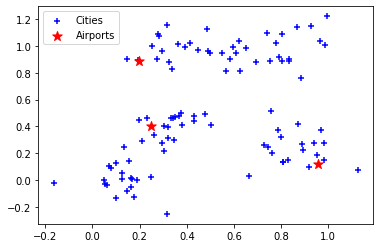

In [141]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airportsOrig = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airportsOrig.append((x,y))

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airportsOrig)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [142]:
import math
import random
import numpy as np

def distance(airport, city):
    x = airport[0]
    y = airport[1]
    xc = city[0]
    yc = city[1]
    dist = math.sqrt((x - xc)**2 + (y - yc)**2)

    return dist


def citySetCal(airports, cities):
    citySets = []
    for i in range (len(airports)):
        citySets.append([])
    for city in cities:
        closestIndex = 0
        minDistance = distance(airports[0], city)
        for i, airport in enumerate(airports[1:]):
            current = distance(airport, city)
            if current < minDistance:
                closestIndex = i + 1
                minDistance = current
        citySets[closestIndex].append(city)

    return citySets

def objectiveFunction(airports ,citySets):
    total = 0
    for i, airport in enumerate(airports):
        x = airport[0]
        y = airport[1]
        citySet = citySets[i]
        for city in citySet:
            xC = city[0]
            yC = city[1]
            total += (x - xC) ** 2 + (y - yC) ** 2

    return total



def calculateGradient(airports ,citySets):
    #[df/dx1,df/y1....]
    gradient = []
    #helps update the airports list from 1-3
    airportsIndex = 0
    # will store the gradients
    dfdx =0
    dfdy =0
    #Summation df/dx 2 * (xi - xc)
    for citySet in citySets:
        airport = airports[airportsIndex]
        for city in citySet:
            dfdx += 2 * (airport[0]-city[0])
            dfdy += 2 * (airport[1]-city[1])
        gradient.append(dfdx)
        gradient.append(dfdy)
        dfdx = 0
        dfdy = 0
        airportsIndex += 1

    return gradient

def gradientDecent(airports, cities):
    state = []
    for pair in airports:
        state.append(pair)

    objectiveValues=[]

    delta = 0.0001
    percentChange = 1

    citySets = citySetCal(state, cities)

    objVal = objectiveFunction(state, citySets)
    objectiveValues.append(objVal)

    while percentChange > delta:
        # Computing gradient
        gradientVector = calculateGradient(state, citySets)
        alpha = 0.005
        # updating and moving current state
        for i, pair in enumerate(state):
            state[i] = (state[i][0] - alpha * gradientVector[2*i], state[i][1] - alpha * gradientVector[2*i + 1])

        # Calculating new city sets
        citySets = citySetCal(state, cities)

        # Store the objective function
        objVal = objectiveFunction(state, citySets)
        objectiveValues.append(objVal)
        currentValue = objectiveValues[-1]
        previousValue = objectiveValues[-2]
        percentChange = abs((previousValue-currentValue)/previousValue)

    return state,objectiveValues

def plot (state,objectiveValues):
    plt.scatter(state,objectiveValues)

state, objectiveValues = gradientDecent(airportsOrig, cities)

<module 'matplotlib.pyplot' from 'c:\\users\\kukuk\\pycharmprojects\\pythonproject1\\airports\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

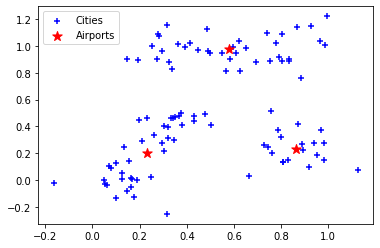

In [143]:
airports = state

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

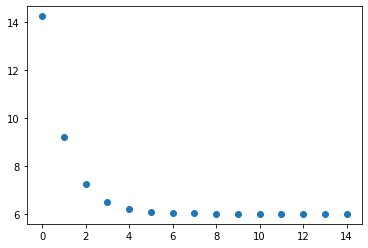

In [144]:
plt.scatter(range(len(objectiveValues)), objectiveValues)
plt.show()